# NYC Taxi Trip Duration Prediction with Decision Tree Regression

## 1. Data Loading and Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_style('whitegrid')
%matplotlib inline

# Load the dataset
df = pd.read_csv('train.csv')
print("Dataset loaded, libraries loaded. First 5 rows:")

# Display first 5 rows
df.head()

Dataset loaded, libraries loaded. First 5 rows:


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [2]:
# Display dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
# Display basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Target Variable Analysis

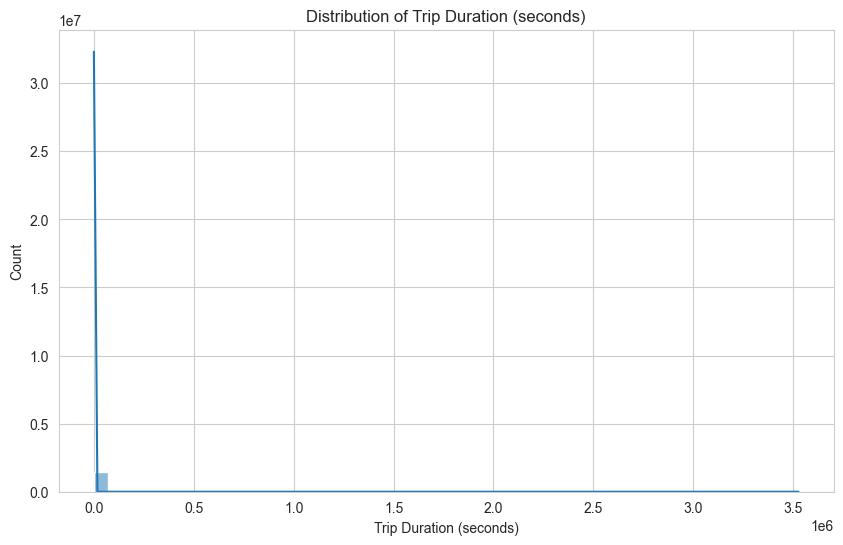

In [7]:
# Plot distribution of trip_duration
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (seconds)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Count')
plt.show()

In [6]:
# Check for outliers by looking at extreme values
print("\nTrip Duration Percentiles:")
print(df['trip_duration'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))


Trip Duration Percentiles:
count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
1%       8.700000e+01
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
99%      3.440000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64


### Key Feature Analysis

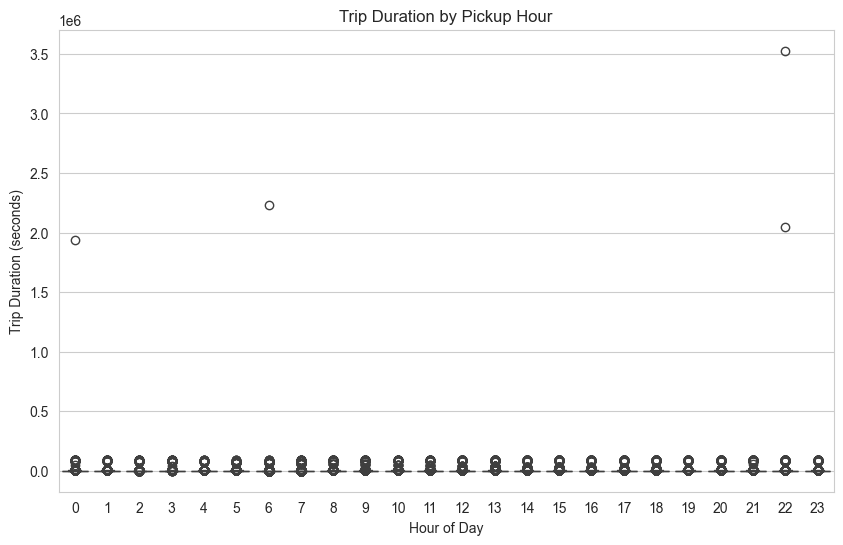

In [8]:
# Convert pickup_datetime to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract hour of day
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Plot trip duration by hour of day
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_hour', y='trip_duration', data=df)
plt.title('Trip Duration by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration (seconds)')
plt.show()

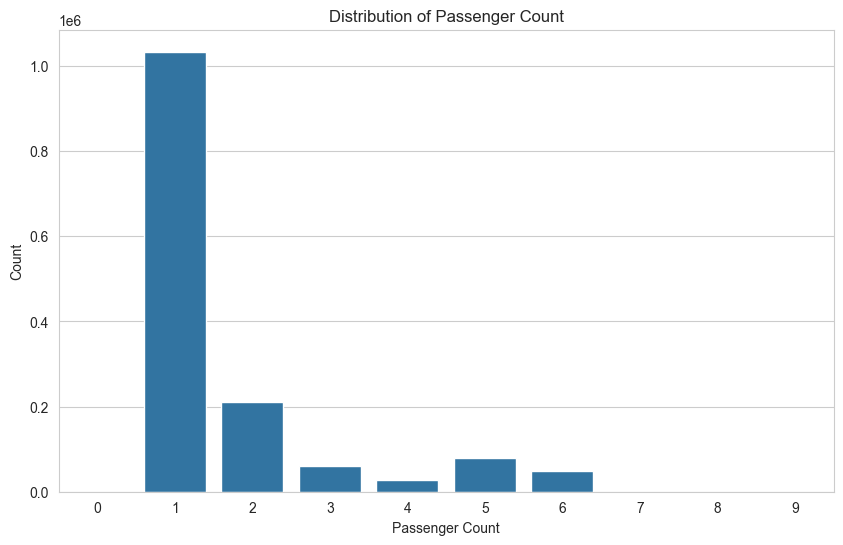

In [9]:
# Plot distribution of passenger_count
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', data=df)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()